# Exercício 05 - Aula 06: 15/09/2023



In [31]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

## Exercício 1

Faça como eu fiz anteriormente com o breast_cancer:

1. Importe os dados e faça uma seleção dos features;
2. Realize o split dos dados em treino e teste;
3. from sklearn.tree import DecisionTreeClassifier... ;
4. Treine e avalie o modelo.

### Tratando o dataset

In [33]:
df = pd.read_csv("Datasets/breast_cancer.csv")

In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df.shape

(569, 32)

In [36]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [37]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [39]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [40]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Decision Tree Classifier

In [41]:
X = df.drop(["id", "diagnosis"], axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
plt.figure(figsize=(25, 10))

plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"],
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization")
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') instead.

<Figure size 2500x1000 with 0 Axes>

In [48]:
y_pred = clf.predict(X_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/pedropadilha/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_23614/2200825717.py", line 1, in <module>
    y_pred = clf.predict(X_test)
  File "/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 500, in predict
    X = self._validate_X_predict(X, check_input)
  File "/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 460, in _validate_X_predict
    X = self._validate_data(
  File "/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py", line 579, in _validate_data
    """
  File "/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py", line 506, in _check_feature_names
ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- area_mean
- area_se
- area_worst
- comp

In [49]:
accuracy1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy1}")

Accuracy: 0.9473684210526315


## Exercício 2

Use o dataset "Faulty Steel Plates" do Kaggle que está disponivel em formato .csv no GitHub e realize uma otimização de hiperparâmetros da árvore utilizando Grid Search.

1. Importe o dataset e faça o tratamento e seleção das variáveis;
2. Faça o split dos dados em treino e teste;
3. Instancie o modelo no pipeline;
4. Defina os hiperparâmetros para o Grid Search;
5. Treine o modelo;
6. Faça o Gráfico da árvore;

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Tratando o dataset

In [51]:
df = pd.read_csv("Datasets/faults.csv")
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [52]:
pd.set_option('display.max_column', None)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


In [53]:
df.shape

(1941, 34)

In [54]:
df.dtypes

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

In [55]:
df.isna().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [56]:
print(f"{df.Stains.sum()}\n{df.Dirtiness.sum()}\n{df.Bumps.sum()}\n{df.Other_Faults.sum()}")

72
55
402
673


In [57]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,1941.000000,1941.000000,1.941000e+03,1.941000e+03,1941.000000,1941.000000,1941.000000,1.941000e+03,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,571.136012,617.964451,1.650685e+06,1.650739e+06,1893.878413,111.855229,82.965997,2.063121e+05,84.548686,130.193715,1459.160227,0.400309,0.599691,78.737764,0.331715,0.414203,0.570767,0.033361,0.610529,0.813472,0.575734,2.492388,1.335686,1.403271,0.083288,-0.131305,0.585420,0.081401,0.097888,0.201443,0.037094,0.028336,0.207110,0.346728
std,520.690671,497.627410,1.774578e+06,1.774590e+06,5168.459560,301.209187,426.482879,5.122936e+05,32.134276,18.690992,144.577823,0.490087,0.490087,55.086032,0.299712,0.137261,0.271058,0.058961,0.243277,0.234274,0.482352,0.788930,0.481612,0.454345,0.500868,0.148767,0.339452,0.273521,0.297239,0.401181,0.189042,0.165973,0.405339,0.476051
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,192.000000,4.712530e+05,4.712810e+05,84.000000,15.000000,13.000000,9.522000e+03,63.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.060400,0.315800,0.361300,0.006600,0.411800,0.596800,0.000000,1.924300,1.000000,1.079200,-0.333300,-0.195000,0.248200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,435.000000,467.000000,1.204128e+06,1.204136e+06,174.000000,26.000000,25.000000,1.920200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,70.000000,0.227300,0.412100,0.555600,0.010100,0.636400,0.947400,1.000000,2.240600,1.176100,1.322200,0.095200,-0.133000,0.506300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1053.000000,1072.000000,2.183073e+06,2.183084e+06,822.000000,84.000000,83.000000,8.301100e+04,106.000000,140.000000,1650.000000,1.000000,1.000000,80.000000,0.573800,0.501600,0.818200,0.023500,0.800000,1.000000,1.000000,2.914900,1.518500,1.732400,0.511600,-0.066600,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Decision Tree Classifier ? Overfitted ?

In [58]:
X = df.drop('Other_Faults', axis=1)
y = df['Other_Faults']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
pipeline = Pipeline([('classifier', dt_classifier)])

param_grid = {
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_split': [5, 10, 15, 20],
    'classifier__min_samples_leaf': [2, 4, 6, 8]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Params: {best_params}")
best_estimator = grid_search.best_estimator_
print(f"Best Estimator: {best_estimator}")

best_estimator.fit(X_train, y_train)

test_accuracy = best_estimator.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using

Best Params: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best Estimator: Pipeline(steps=[('classifier',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])
Test Accuracy: 1.0


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using

In [59]:
plt.figure(figsize=(15, 10))
plot_tree(
    best_estimator.named_steps['classifier'],
    filled=True,
    feature_names=X.columns,
    class_names=['No Fault', 'Fault'],
    rounded=True
)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps'],
      dtype='object') instead.

<Figure size 1500x1000 with 0 Axes>

## Exercício 3

Use o dataset house_prices, aplique o DecisionTreeRegressor. Realize uma otimização de hiperparâmetros da árvore utilizando Grid Search.

1. Importe o dataset e faça o tratamento e seleção das variáveis;
2. Faça o split dos dados em treino e teste;
3. Instancie o modelo no pipeline;

  3.1. Treine um modelo base para referência;
4. Defina os hiperparâmetros para o Grid Search;
5. Treine o modelo;
6. Faça o Gráfico da árvore;

### Tratando o dataset

In [60]:
df = pd.read_csv("Datasets/house_prices.csv")

In [61]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [62]:
# Informações de Tamanho (Linha, Coluna)
df.shape

(2919, 81)

In [63]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [65]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [66]:
# Tratando dados - mantendo somente informações numéricas
df_filtered = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

In [67]:
df_filtered.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [68]:
df_filtered.shape

(2919, 37)

In [69]:
df_filtered.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [70]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2433 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2896 non-null   float64
 8   BsmtFinSF1     2918 non-null   float64
 9   BsmtFinSF2     2918 non-null   float64
 10  BsmtUnfSF      2918 non-null   float64
 11  TotalBsmtSF    2918 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2917 non-null   float64
 17  BsmtHalfBath   2917 non-null   float64
 18  FullBath

In [71]:
df_filtered.isna().sum()

MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [72]:
# Mesmo tendo muitos valores (~50%) NAN na coluna SalePrice, não podemos deixar que essas linhas se mantenham pois é o nosso Target.
# Dessa forma vou limpar essas linhas para trabalhar com um dataset mais confiável.
df_filtered = df_filtered.dropna(subset=['SalePrice'])

In [73]:
df_filtered.shape

(1460, 37)

In [74]:
df_filtered.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [75]:
# Considerando que 8 linhas são apenas 0,5% do total de dados removo as linhas NAN da coluna 'MasVnrArea'
df_filtered = df_filtered.dropna(subset=['MasVnrArea'])

<Axes: >

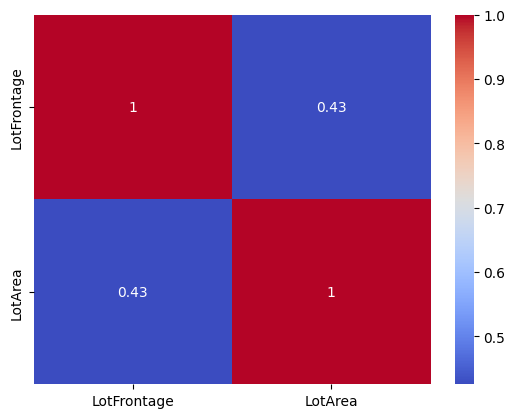

In [77]:
columns_corr = df_filtered[['LotFrontage', 'LotArea']]
sns.heatmap(columns_corr.corr(), annot=True, cmap='coolwarm')

<Axes: >

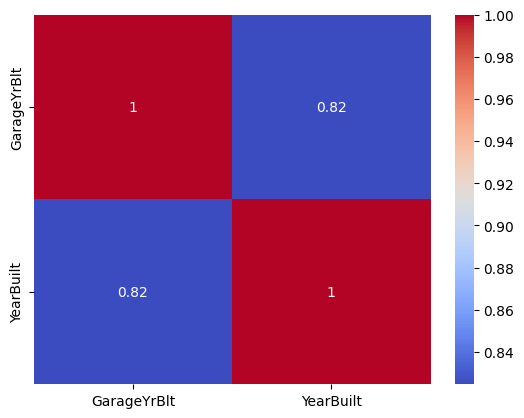

In [78]:
columns_corr = df_filtered[['GarageYrBlt', 'YearBuilt']]
sns.heatmap(columns_corr.corr(), annot=True, cmap='coolwarm')

In [79]:
# Considerando que a correlação entre as colunas é razoável, removo a coluna 'LotFrontage' para eliminar dados NAN
df_filtered = df_filtered.drop('LotFrontage', axis=1)
# Considerando que a correlação entre as colunas é razoável, removo a coluna 'GarageYrBlt' para eliminar dados NAN
df_filtered = df_filtered.drop('GarageYrBlt', axis=1)

In [80]:
df_filtered.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


In [81]:
df_filtered.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,6.517218,0.612259,1.765152,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361
std,42.340097,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,1.626065,0.643422,0.748496,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [82]:
df_filtered.isna().sum().sum()

0

In [83]:
df_filtered.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,56.949036,10507.276171,6.092975,5.579201,1971.116391,1984.775482,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,0.423554,0.057851,1.562672,0.381543,2.867080,1.046143,6.517218,0.612259,1.765152,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,6.318182,2007.815427,180615.063361
std,42.340097,9989.563592,1.381289,1.113136,30.193761,20.652466,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,0.518782,0.239372,0.550231,0.502664,0.814812,0.219498,1.626065,0.643422,0.748496,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,2.699644,1.328927,79285.541485
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7538.750000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,9478.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1461.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [84]:
df_filtered.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


### Decision Tree Classifier

In [85]:
X = df_filtered.drop('SalePrice', axis=1)
y = df_filtered['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
print("Best Model:")
print(best_model)

accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  _, class_perm = np.unique(y_idx, return_inverse=True)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persi

[CV 2/5; 1/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 1/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 1/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 5/5; 1/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 2/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 2/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 2/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5


e from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/

[CV 5/5; 1/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.009 total time=   1.1s
[CV 1/5; 1/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.021 total time=   1.2s
[CV 3/5; 1/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.2s
[CV 1/5; 2/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.021 total time=   1.1s
[CV 2/5; 2/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.1s
[CV 4/5; 2/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 1/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.009 total time=   1.3s
[CV 5/5; 2/90] START cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 3/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 3/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 1/5; 4/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 3/5; 3/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.7s
[CV 2/5; 4/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 3/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.7s
[CV 5/5; 2/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   0.8s
[CV 3/5; 4/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 3/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.8s[CV 4/5; 2/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   1.0s

[CV 1/5; 5/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 2/5; 5/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 5/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 4/5; 5/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 4/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   0.5s
[CV 5/5; 5/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 4/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.6s
[CV 1/5; 6/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 5/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.5s
[CV 2/5; 6/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10[CV 4/5; 4/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.7s

[CV 3/5; 6/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 5/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.022 total time=   0.6s
[CV 5/5; 4/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.7s
[CV 4/5; 6/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 6/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_le

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 5/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   0.7s
[CV 1/5; 7/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 5/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   0.9s
[CV 2/5; 7/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 6/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 3/5; 7/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 5/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 7/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 3/5; 6/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.4s
[CV 5/5; 7/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 6/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 1/5; 8/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 6/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.8s
[CV 2/5; 8/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 6/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.8s
[CV 3/5; 7/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   0.5s
[CV 3/5; 8/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 4/5; 8/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 2/5; 7/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.022 total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 8/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 7/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.6s
[CV 1/5; 9/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 1/5; 8/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.021 total time=   0.6s
[CV 1/5; 7/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.021 total time=   0.9s
[CV 4/5; 7/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   0.7s
[CV 3/5; 9/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 9/90] START clf__criterion=gini, clf__max_depth=None, clf__min_samples_lea

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 9/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   0.6s[CV 4/5; 8/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   0.8s

[CV 3/5; 9/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.6s
[CV 3/5; 10/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 9/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.022 total time=   0.5s
[CV 4/5; 10/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 9/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.6s
[CV 5/5; 10/90] START clf__criterion=gini, clf__max_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 9/90] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.5s
[CV 3/5; 11/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 10/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   0.5s
[CV 4/5; 11/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 10/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   0.5s
[CV 5/5; 11/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 10/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.017 total time=   0.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 12/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 4/5; 10/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.022 total time=   0.5s
[CV 2/5; 12/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 11/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   0.5s
[CV 3/5; 12/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 1/5; 11/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 12/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 10/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.022 total time=   0.6s
[CV 5/5; 12/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 11/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.017 total time=   0.5s
[CV 1/5; 12/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.4s
[CV 1/5; 13/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 13/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using v

[CV 2/5; 12/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.4s
[CV 5/5; 11/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.026 total time=   0.6s
[CV 3/5; 13/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 13/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 11/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   0.6s
[CV 4/5; 12/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 5/5; 13/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 1/5; 14/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 12/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.026 total time=   0.5s
[CV 3/5; 14/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 2/5; 13/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.4s
[CV 4/5; 14/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 13/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   0.5s
[CV 5/5; 14/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 13/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.017 total time=   0.5s
[CV 1/5; 15/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 14/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.013 total time=   0.4s
[CV 2/5; 15/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 13/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.022 total time=   0.5s
[CV 3/5; 15/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 4/5; 13/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.017 total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 14/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   0.6s
[CV 4/5; 15/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 15/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 15/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.3s
[CV 1/5; 16/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 14/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   0.5s
[CV 3/5; 14/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   0.6s
[CV 2/5; 16/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 15/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.4s
[CV 5/5; 16/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 15/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.3s
[CV 1/5; 17/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 15/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.017 total time=   0.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 17/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 15/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.026 total time=   0.5s
[CV 3/5; 16/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.017 total time=   0.4s
[CV 2/5; 16/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   0.4s
[CV 3/5; 17/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 4/5; 17/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 17/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 1/5; 16/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.01

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 17/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.017 total time=   0.3s
[CV 4/5; 18/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 1/5; 18/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 5/5; 18/90] START clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 17/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   0.6s
[CV 3/5; 18/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 1/5; 19/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 19/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, c

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 18/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   0.6s
[CV 3/5; 17/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.017 total time=   0.7s
[CV 1/5; 20/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 20/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 18/90] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.026 total time=   0.5s
[CV 3/5; 20/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 19/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.026 total time=   1.0s
[CV 4/5; 20/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 5/5; 19/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.022 total time=   0.9s
[CV 2/5; 19/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.1s
[CV 5/5; 20/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 21/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 20/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.021 total time=   1.0s
[CV 4/5; 19/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   1.1s
[CV 2/5; 21/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 19/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.1s
[CV 3/5; 21/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 20/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   1.0s
[CV 4/5; 21/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 21/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 20/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.0s
[CV 1/5; 22/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 20/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   0.8s
[CV 2/5; 22/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 20/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   0.8s
[CV 3/5; 22/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 21/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.7s
[CV 4/5; 22/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 21/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.021 total time=   1.0s
[CV 3/5; 21/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.9s
[CV 5/5; 22/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 1/5; 23/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 21/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.9s
[CV 1/5; 22/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.017 total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 23/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 23/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 4/5; 22/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   0.6s
[CV 4/5; 21/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.3s
[CV 4/5; 23/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 23/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 2/5; 22/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   0.8s
[CV 1/5; 24/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 23/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.013 total time=   0.6s[CV 2/5; 23/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   0.5s

[CV 2/5; 24/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 3/5; 24/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 3/5; 22/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.9s
[CV 4/5; 24/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 23/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   0.7s
[CV 5/5; 24/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 22/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.0s
[CV 1/5; 25/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 23/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.7s
[CV 2/5; 25/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 24/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.026 total time=   0.8s
[CV 3/5; 25/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 24/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.7s
[CV 4/5; 23/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.0s
[CV 4/5; 25/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 2/5; 24/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.8s
[CV 5/5; 25/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 26/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 24/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.8s
[CV 1/5; 25/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.017 total time=   0.7s
[CV 2/5; 26/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 26/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 24/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   1.1s
[CV 2/5; 25/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.017 total time=   0.6s
[CV 4/5; 26/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 25/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.5s
[CV 5/5; 26/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 1/5; 27/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 25/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.6s
[CV 2/5; 27/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 5/5; 25/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.7s
[CV 3/5; 27/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 26/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.022 total time=   0.5s
[CV 3/5; 26/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   0.5s
[CV 4/5; 27/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 27/90] START clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 1/5; 26/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.021 total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 26/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   0.7s
[CV 1/5; 28/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 28/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 5/5; 26/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   0.8s
[CV 3/5; 28/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 27/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   1.1s
[CV 2/5; 27/90] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   1.0s
[CV 4/5; 28/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 28/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.1s
[CV 4/5; 29/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 28/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   1.2s
[CV 5/5; 29/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 29/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.017 total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 30/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 29/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   0.7s
[CV 2/5; 30/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 28/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.2s
[CV 3/5; 30/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 29/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   0.8s
[CV 4/5; 30/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 4/5; 28/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0

 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-

[CV 1/5; 31/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 29/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   0.7s
[CV 2/5; 31/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 3/5; 30/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.7s
[CV 3/5; 31/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 29/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.1s
[CV 4/5; 31/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 30/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.9s
[CV 1/5; 30/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.017 total time=   1.0s
[CV 5/5; 31/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 30/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.9s
[CV 1/5; 32/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 30/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 32/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 32/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 31/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 32/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 2/5; 31/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.8s
[CV 5/5; 32/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 31/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.7s
[CV 1/5; 33/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 31/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   0.7s
[CV 2/5; 33/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 32/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   0.8s
[CV 5/5; 31/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.0s
[CV 3/5; 33/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 32/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   1.0s
[CV 3/5; 32/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   0.9s
[CV 4/5; 33/90] START clf__criterion=gini, clf__max_depth=3

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 32/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.013 total time=   1.0s
[CV 2/5; 34/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 32/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.9s
[CV 3/5; 34/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 33/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.030 total time=   1.0s
[CV 4/5; 34/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 33/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.0s
[CV 5/5; 34/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 34/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.021 total time=   0.9s
[CV 4/5; 33/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.9s
[CV 1/5; 35/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 2/5; 35/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 33/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   1.0s
[CV 3/5; 34/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.7s
[CV 2/5; 34/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.017 total time=   0.8s
[CV 3/5; 35/90] START clf__criterion=gini, clf__max_depth=3

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 36/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 34/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   0.7s
[CV 5/5; 34/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.5s
[CV 2/5; 36/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 3/5; 36/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 35/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   0.5s
[CV 4/5; 36/90] START clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 35/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 37/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 5/5; 35/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   0.7s
[CV 5/5; 37/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 38/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 4/5; 36/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.4s
[CV 2/5; 38/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 36/90] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.5s
[CV 3/5; 38/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 37/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   0.5s
[CV 4/5; 38/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 37/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   0.6s
[CV 5/5; 38/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 38/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   0.4s
[CV 1/5; 39/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 39/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 37/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   0.8s
[CV 3/5; 39/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 37/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   0.9s
[CV 4/5; 39/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 1/5; 38/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   0.9s
[CV 5/5; 39/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 4/5; 38/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   0.5s
[CV 1/5; 40/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 40/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 39/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   0.5s
[CV 3/5; 40/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 3/5; 38/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   0.7s
[CV 4/5; 40/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 38/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   0.7s
[CV 5/5; 40/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 39/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.0

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 39/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   0.9s
[CV 1/5; 42/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 4/5; 40/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 42/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 41/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.5s
[CV 3/5; 42/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 41/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   0.5s
[CV 3/5; 41/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   0.6s
[CV 5/5; 40/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.8s
[CV 4/5; 42/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 42/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 42/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.017 total time=   0.5s
[CV 4/5; 41/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.0s
[CV 3/5; 42/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.5s
[CV 3/5; 43/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 42/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.5s
[CV 4/5; 43/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 43/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 44/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 44/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 44/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 2/5; 43/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.017 total time=   0.6s
[CV 4/5; 44/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 42/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   0.8s
[CV 5/5; 44/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version

[CV 5/5; 43/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   0.5s
[CV 1/5; 45/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 44/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   0.5s
[CV 2/5; 45/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 44/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   0.4s
[CV 4/5; 43/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   0.6s
[CV 3/5; 45/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 45/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, cl

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 45/90] START clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10[CV 5/5; 44/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   0.4s

[CV 1/5; 44/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.017 total time=   0.7s
[CV 1/5; 46/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 46/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 44/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   0.7s
[CV 3/5; 46/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version

[CV 2/5; 45/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   0.4s
[CV 4/5; 46/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 45/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.4s
[CV 5/5; 46/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 45/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.017 total time=   0.6s
[CV 1/5; 47/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 45/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   0.7s[CV 5/5; 45/90] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   0.6s

[CV 2/5; 47/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 47/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 46/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   1.3s
[CV 4/5; 47/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 47/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.3s
[CV 3/5; 46/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.5s
[CV 5/5; 47/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 48/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 46/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.4s
[CV 2/5; 48/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 46/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.009 total time=   1.9s
[CV 3/5; 48/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 47/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.3s
[CV 4/5; 48/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 46/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.9s
[CV 5/5; 48/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 47/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 49/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 47/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.3s
[CV 2/5; 49/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 47/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   1.5s
[CV 3/5; 49/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 1/5; 48/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.017 total time=   1.6s
[CV 4/5; 49/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 48/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.000 total time=   1.8s
[CV 5/5; 49/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 48/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   2.1s
[CV 1/5; 50/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 48/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   2.3s
[CV 2/5; 50/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 48/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   2.2s
[CV 3/5; 50/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 49/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   2.1s
[CV 4/5; 50/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 49/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.4s
[CV 5/5; 50/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 49/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   1.6s
[CV 2/5; 49/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   2.3s
[CV 1/5; 51/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 51/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 49/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.6s
[CV 3/5; 51/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 50/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   1.0s
[CV 4/5; 51/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 50/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   1.2s
[CV 5/5; 51/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 50/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.4s
[CV 1/5; 52/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 50/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.0s
[CV 2/5; 52/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 50/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   1.4s
[CV 3/5; 52/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 51/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.1s
[CV 4/5; 52/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 51/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.000 total time=   1.3s
[CV 5/5; 52/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 51/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.0s
[CV 1/5; 53/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 51/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.1s
[CV 2/5; 53/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 51/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.5s
[CV 3/5; 53/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 2/5; 52/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.0s
[CV 4/5; 53/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 52/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.1s
[CV 5/5; 53/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 1/5; 52/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.5s
[CV 1/5; 54/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version


[CV 1/5; 53/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.1s
[CV 2/5; 54/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 3/5; 52/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 54/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 53/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.000 total time=   1.3s
[CV 4/5; 54/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 52/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   1.7s
[CV 5/5; 54/90] START clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 53/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.3s
[CV 1/5; 55/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 53/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.7s
[CV 2/5; 55/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 54/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.0s
[CV 3/5; 55/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 53/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.7s
[CV 4/5; 55/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 54/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.6s
[CV 5/5; 55/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 54/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.3s
[CV 1/5; 56/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 54/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.7s
[CV 5/5; 54/90] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   1.3s
[CV 2/5; 56/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 56/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 55/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.017 total time=   1.3s
[CV 4/5; 56/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 55/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.9s
[CV 5/5; 56/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 55/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.009 total time=   1.8s
[CV 1/5; 57/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 56/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.3s
[CV 2/5; 57/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 1/5; 56/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.5s
[CV 3/5; 57/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 55/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   1.7s
[CV 4/5; 55/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.009 total time=   1.7s
[CV 4/5; 57/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 57/90] START clf__criterion=entropy, clf__max_depth=10, clf

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 56/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.6s
[CV 1/5; 58/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 56/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.5s
[CV 2/5; 58/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 56/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.8s
[CV 3/5; 58/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 57/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.3s
[CV 3/5; 57/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   1.4s
[CV 4/5; 58/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 58/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 57/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   1.8s
[CV 1/5; 59/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 2/5; 57/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 59/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 4/5; 57/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.8s
[CV 3/5; 59/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 58/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.6s
[CV 4/5; 59/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version


[CV 2/5; 58/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.1s
[CV 5/5; 59/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 58/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.1s
[CV 1/5; 60/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 58/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.1s
[CV 2/5; 60/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 59/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   0.9s
[CV 3/5; 60/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 58/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.000 total time=   1.7s
[CV 4/5; 60/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 59/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.2s
[CV 5/5; 60/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 59/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.013 total time=   1.7s
[CV 1/5; 61/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 3/5; 59/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 61/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 60/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   0.9s
[CV 3/5; 61/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 2/5; 60/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   0.8s
[CV 2/5; 59/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.7s
[CV 4/5; 61/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 61/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 60/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.2s
[CV 1/5; 62/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 60/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   1.2s
[CV 3/5; 61/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   1.1s
[CV 3/5; 62/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5[CV 2/5; 62/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5

[CV 1/5; 61/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.2s
[CV 4/5; 62/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 4/5; 60/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.5s
[CV 5/5; 62/90] START clf__criterion=entropy, clf__max_depth=10, clf_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 61/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.3s
[CV 1/5; 63/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 61/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.5s
[CV 2/5; 63/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 5/5; 61/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   1.5s
[CV 3/5; 63/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 62/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.2s
[CV 4/5; 63/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 62/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.1s
[CV 5/5; 63/90] START clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 62/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.2s
[CV 1/5; 64/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 63/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.1s
[CV 2/5; 62/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.7s
[CV 2/5; 64/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 64/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 1/5; 63/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   1.6s
[CV 4/5; 64/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 63/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.0s
[CV 5/5; 64/90] START clf__criterion=entropy, clf__max_depth=20, clf

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 62/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   2.0s
[CV 1/5; 65/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 63/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.000 total time=   1.7s
[CV 2/5; 65/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 63/90] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   1.2s
[CV 3/5; 65/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 64/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.6s
[CV 4/5; 65/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 64/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.4s
[CV 5/5; 65/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 65/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.2s
[CV 1/5; 66/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 3/5; 64/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 66/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 64/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   1.9s
[CV 3/5; 66/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 65/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.7s
[CV 4/5; 66/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 4/5; 64/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   2.3s
[CV 5/5; 66/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 65/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.8s
[CV 1/5; 67/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 66/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.2s
[CV 2/5; 67/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 65/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   2.0s
[CV 3/5; 67/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 66/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   1.7s
[CV 4/5; 67/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 66/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.7s
[CV 5/5; 67/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 65/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 68/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 66/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.3s
[CV 2/5; 68/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 67/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   1.3s
[CV 3/5; 68/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 4/5; 66/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.8s
[CV 4/5; 68/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 67/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.2s
[CV 5/5; 68/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 67/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   0.9s
[CV 1/5; 69/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 67/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   1.5s
[CV 2/5; 69/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 68/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.1s
[CV 3/5; 69/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 4/5; 67/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.5s
[CV 4/5; 69/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 68/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.5s
[CV 3/5; 68/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.3s
[CV 5/5; 69/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 70/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 68/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.4s
[CV 2/5; 70/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 69/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.0s
[CV 3/5; 70/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 68/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   1.3s
[CV 4/5; 70/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 3/5; 69/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 70/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 2/5; 69/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.000 total time=   1.2s
[CV 1/5; 71/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 69/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.5s
[CV 2/5; 71/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 70/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.1s
[CV 2/5; 70/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.2s
[CV 5/5; 69/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.5s
[CV 3/5; 71/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 4/5; 71/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 71/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 1/5; 70/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.6s
[CV 1/5; 72/90] START clf__criterion=entropy, clf__max_depth=20, clf__

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version


[CV 5/5; 70/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.2s
[CV 4/5; 70/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.4s
[CV 3/5; 72/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 72/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 1/5; 71/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.2s
[CV 4/5; 72/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 71/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.000 total time=   1.4s
[CV 5/5; 72/90] START clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 5/5; 71/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.2s
[CV 1/5; 72/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.1s
[CV 1/5; 73/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 73/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 71/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 73/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 71/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.5s
[CV 4/5; 73/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 72/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 73/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 2/5; 72/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.000 total time=   1.4s
[CV 1/5; 74/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 3/5; 72/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.5s
[CV 2/5; 74/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 72/90] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   1.5s
[CV 3/5; 74/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 4/5; 73/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 74/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 74/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   1.1s
[CV 5/5; 73/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.4s
[CV 5/5; 74/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 1/5; 75/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 1/5; 74/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.013 total time=   1.3s
[CV 2/5; 75/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 73/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_sam

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 73/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   2.1s
[CV 5/5; 75/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 74/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.5s
[CV 1/5; 76/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 2/5; 75/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.2s
[CV 5/5; 74/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   1.4s
[CV 2/5; 76/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 3/5; 76/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 74/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.022 total time=   1.9s
[CV 4/5; 76/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 4/5; 75/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.3s
[CV 5/5; 76/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 75/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.9s
[CV 1/5; 77/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 75/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   1.8s
[CV 2/5; 77/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 75/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.6s
[CV 3/5; 77/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 76/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.0s
[CV 4/5; 77/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 76/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   0.9s
[CV 5/5; 77/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 76/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 78/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 4/5; 76/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.000 total time=   1.6s
[CV 2/5; 78/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 76/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.8s
[CV 3/5; 78/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 77/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.3s
[CV 4/5; 78/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 77/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.4s
[CV 5/5; 78/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 77/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.8s
[CV 1/5; 79/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 77/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.4s
[CV 4/5; 77/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.004 total time=   1.5s
[CV 2/5; 79/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 79/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 1/5; 78/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   1.7s
[CV 4/5; 79/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 78/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.000 total time=   1.7s
[CV 5/5; 79/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 78/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   2.2s
[CV 1/5; 80/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 78/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   2.3s
[CV 2/5; 80/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 4/5; 78/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   2.5s
[CV 1/5; 79/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   2.2s
[CV 3/5; 80/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 80/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 79/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   2.1s
[CV 5/5; 80/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 79/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.000 total time=   2.4s
[CV 1/5; 81/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 79/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   2.0s
[CV 2/5; 81/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 80/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.2s
[CV 3/5; 81/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 5/5; 79/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   2.0s
[CV 4/5; 81/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 80/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.1s
[CV 5/5; 81/90] START clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 80/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.4s
[CV 1/5; 81/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.1s
[CV 1/5; 82/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 80/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.4s
[CV 2/5; 82/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 80/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.004 total time=   1.6s
[CV 3/5; 82/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 4/5; 82/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2
[CV 3/5; 81/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.1s
[CV 5/5; 82/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 81/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.000 total time=   1.8s
[CV 1/5; 83/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 81/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.8s
[CV 2/5; 83/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 81/90] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.9s
[CV 3/5; 83/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 82/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.004 total time=   2.1s
[CV 4/5; 83/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 82/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   2.3s
[CV 5/5; 83/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5
[CV 2/5; 82/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.000 total time=   2.4s
[CV 1/5; 84/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 5/5; 82/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   1.9s
[CV 2/5; 84/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 82/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2;, score=0.013 total time=   2.5s
[CV 3/5; 84/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 83/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.009 total time=   2.3s
[CV 4/5; 84/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 84/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   0.9s
[CV 5/5; 84/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10
[CV 2/5; 83/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   2.1s
[CV 1/5; 85/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 5/5; 83/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.004 total time=   1.2s
[CV 2/5; 85/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 1/5; 84/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.013 total time=   1.2s
[CV 3/5; 85/90] START clf__criterion=entropy, clf__max_depth=40, clf

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 83/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.000 total time=   1.7s
[CV 4/5; 85/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2
[CV 3/5; 83/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5;, score=0.017 total time=   2.1s
[CV 5/5; 85/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 84/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.5s
[CV 1/5; 86/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 84/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.004 total time=   1.3s
[CV 2/5; 86/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 5/5; 84/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10;, score=0.009 total time=   1.2s
[CV 3/5; 86/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 85/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.8s
[CV 4/5; 86/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 3/5; 85/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.009 total time=   1.8s
[CV 5/5; 86/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5
[CV 1/5; 85/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   2.0s
[CV 1/5; 87/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 85/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.004 total time=   1.8s
[CV 2/5; 87/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 2/5; 86/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   1.2s
[CV 3/5; 87/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 5/5; 85/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2;, score=0.013 total time=   1.8s
[CV 4/5; 87/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 3/5; 86/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.017 total time=   1.4s
[CV 5/5; 87/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10
[CV 1/5; 86/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.013 total time=   2.0s
[CV 1/5; 88/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 5/5; 86/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.009 total time=   1.6s
[CV 2/5; 88/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 4/5; 87/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.3s
[CV 3/5; 88/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2[CV 1/5; 87/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.009 total time=   1.7s

[CV 4/5; 86/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5;, score=0.000 total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 88/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 5/5; 88/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2
[CV 2/5; 87/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.004 total time=   1.8s
[CV 3/5; 87/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.7s
[CV 1/5; 89/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 87/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10;, score=0.013 total time=   1.5s
[CV 2/5; 89/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 3/5; 89/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 88/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   1.6s
[CV 4/5; 89/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 2/5; 88/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.9s
[CV 5/5; 89/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5
[CV 5/5; 88/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.013 total time=   1.8s
[CV 1/5; 90/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 4/5; 88/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.004 total time=   1.9s
[CV 2/5; 89/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.000 total time=   1.6s
[CV 3/5; 90/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 2/5; 90/90] START clf__criterion=entropy, clf__max_depth=40, clf_

/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 1/5; 89/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.7s
[CV 4/5; 90/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 3/5; 88/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2;, score=0.009 total time=   2.1s
[CV 5/5; 90/90] START clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10
[CV 3/5; 89/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV 4/5; 89/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.009 total time=   1.9s
[CV 1/5; 90/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.009 total time=   1.4s
[CV 5/5; 89/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5;, score=0.013 total time=   1.6s
[CV 2/5; 90/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.000 total time=   1.5s
[CV 3/5; 90/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.013 total time=   1.5s[CV 4/5; 90/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, score=0.004 total time=   1.5s

[CV 5/5; 90/90] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10;, scor

In [86]:
from sklearn.model_selection import StratifiedKFold

In [87]:
X = df_filtered.drop('SalePrice', axis=1)
y = df_filtered['SalePrice']

# Create StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline that includes data preprocessing and the Decision Tree Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('clf', DecisionTreeClassifier())  # Decision Tree Classifier
])

# Define the hyperparameters and their possible values for grid search
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 10, 20, 30, 40],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with StratifiedKFold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, n_jobs=-1, verbose=2)
grid_search.fit(X, y)  # You can use the entire dataset for grid search

# Print the best hyperparameters and the corresponding accuracy on the test set
print("Best Hyperparameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
# If you want to evaluate on a separate test set, use train_test_split here
accuracy = best_model.score(X, y)
print("Accuracy on the entire dataset:", accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  _, class_perm = np.unique(y_idx, return_inverse=True)
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persi

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.3s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.4s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.4s[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.4s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.4s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.4s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.3s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.4s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.6s[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.5s

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.6s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.6s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.4s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.3s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.3s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.5s[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.1s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s



/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.2s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   0.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.6s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   0.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.5s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.9s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.8s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.0s
[CV] END clf__criterion=gini, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   0.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.6s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.2s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.3s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.2s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=None, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   3.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   3.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   3.0s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.5s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.2s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.9s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=10, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.7s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.9s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.5s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.7s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=20, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.5s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.0s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.6s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.8s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.7s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.5s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.1s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=30, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   2.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.9s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   2.3s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=2; total time=   3.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.6s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.6s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   1.5s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=5; total time=   2.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=1, clf__min_samples_split=10; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=2; total time=   2.2s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   2.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=5; total time=   1.9s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.8s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.8s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.6s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.7s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=2, clf__min_samples_split=10; total time=   2.7s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.2s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=2; total time=   2.1s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.3s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.4s


/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/pedropadilha/.local/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.3.0 when using version

[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   1.9s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.7s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=5; total time=   2.0s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.4s
[CV] END clf__criterion=entropy, clf__max_depth=40, clf__min_samples_leaf=4, clf__min_samples_split=10; total time=   1.8s
Best Hyperparameter

In [88]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(best_model.named_steps['clf'], feature_names=X.columns, filled=True, class_names=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>